## China's Belt and Road Initiative

In late 2013, China launched the Belt and Road Initiative (BRI)—a sweeping plan to promote infrastructure development across Africa, Asia, and Europe with Chinese financing. From 2014 through 2017, loans totaling over $120 billion have backed projects ranging from highways to railroads to power plants. China hopes these funds will spur growth in its near abroad, expand its exports and access to land-based and maritime transport facilities, boost its manufacturing and construction firms, and strengthen its economic, political, and military influence abroad. Yet if the new investments fail to generate sufficient returns, they may also boost debt levels unsustainably and create political frictions with China.

This post was inspired by the CFR's [Belt and Road Tracker](https://www.cfr.org/article/belt-and-road-tracker), which looks at the the changing bilateral economic relationships with China over time. The tracker focuses on three Belt and Road indicators—imports from China, foreign direct investment (FDI) from China, and external debt to China—for sixty-seven participant countries.

In [11]:
import pandas as pd
import math
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)

import plotly_express as px
import country_converter as coco
import pycountry

### Imports from China

The first indicator to measure countries’ goods imports from China as a percentage of their gross domestic product (GDP). This indicator can be used to gauge China’s success in using BRI to raise demand for its exports. Since 2013, goods purchases from China have spiked particularly in Middle Eastern and African countries.


Data Source: The World Banks World Integrated Trade Solution - [China's Export to Partner Share in % of GDP](https://wits.worldbank.org/CountryProfile/en/Country/CHN/StartYear/1992/EndYear/2017/TradeFlow/Export/Partner/BY-COUNTRY/Indicator/XPRT-PRTNR-SHR)

In [101]:
df = pd.read_csv('china_imports.csv',encoding = "ISO-8859-1").drop(['Reporter Name', 'Trade Flow', 'Indicator'],axis=1).set_index('Partner Name')
df = df.rename(index={'United States': 'United States of America', 'Iran, Islamic Rep.':'Islamic Republic of Iran',
                'Egypt, Arab Rep.':'Arab Republic of Egypt', 'Congo, Dem. Rep.':'Congo, The Democratic Republic of the',
                'Ethiopia(excludes Eritrea)':'Ethiopia', 'Eritrea':'the State of Eritrea', 'Czech Republic':'Czechia',
                'Serbia, FR(Serbia/Montenegro)':'Serbia','Slovak Republic':'Slovak Republic', 'Macedonia, FYR':'The Former Yugoslav Republic of Macedonia',
                'Cote d\'Ivoire':'Republic of Côte d\'Ivoire', 'Sudan':'Republic of the Sudan', 'South Sudan':'Republic of South Sudan', 'Lao PDR':'Lao People\'s Democratic Republic',
                'Vietnam':'Socialist Republic of Viet Nam', 'East Timor':'Democratic Republic of Timor-Leste'})

# def get_country_code(name):
#     for co in list(pycountry.countries):
#         if name in co.name:
#             return co.alpha_3
#     return None


# df['Code'] = df['Partner Name'].apply(get_country_code)

df = df.reset_index()
df = df.melt(id_vars=["Partner Name"], 
        var_name="Year", 
        value_name="% of GDP")


df = df.sort_values(['Partner Name', 'Year'], ascending=[True, True])
df = df.dropna()

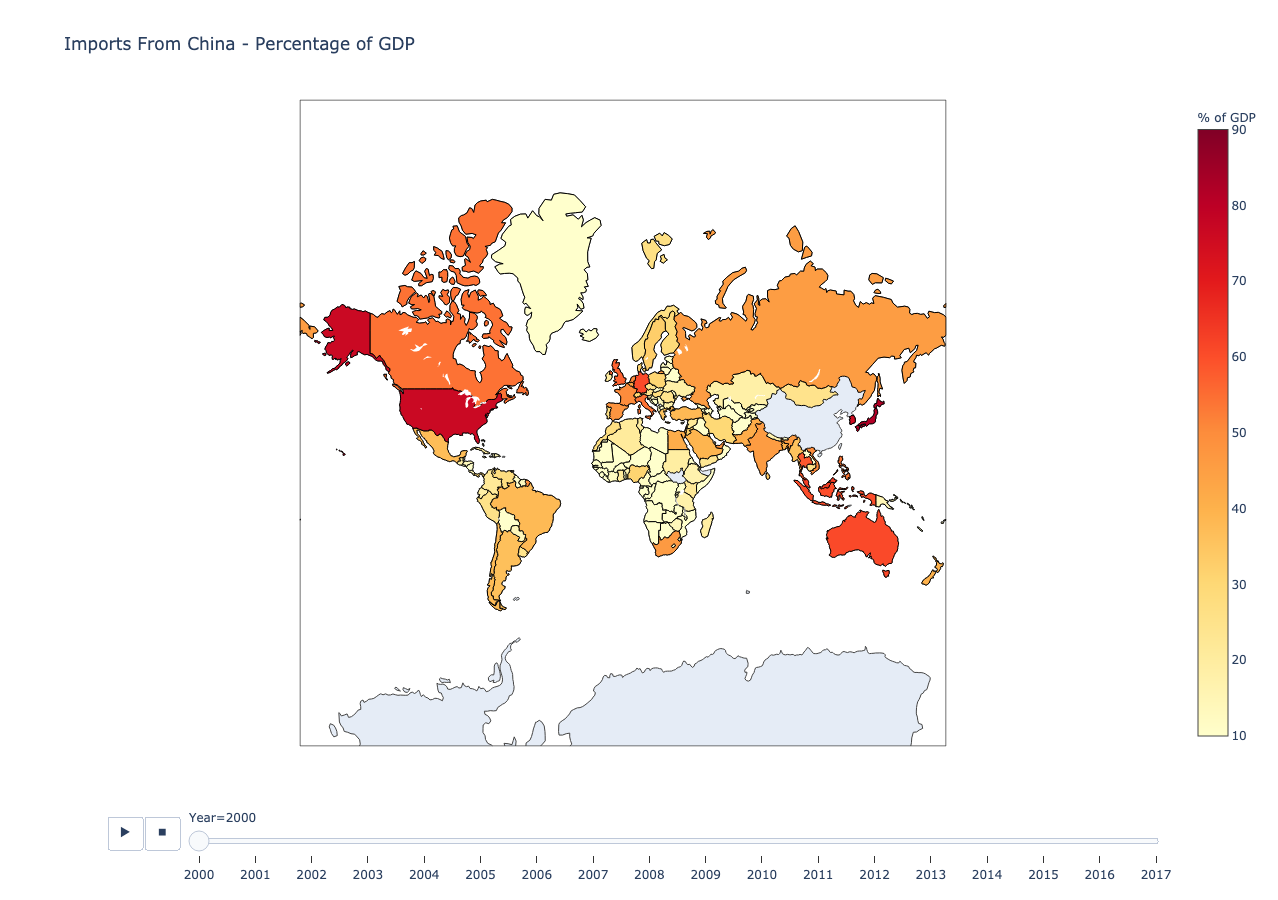

In [102]:
px.choropleth(df, locations="Partner Name", locationmode='country names',color="% of GDP", hover_name="Partner Name", animation_frame="Year",
             color_continuous_scale=px.colors.sequential.YlOrRd, range_color=[10,90], projection='mercator', title='Imports From China - Percentage of GDP',
             width=900, height=900, center={'lat':35.0,'lon':0.0})

### Foreign Direct Investment

The foreign direct investment indicator uses data to measure the proportion of countries’ total inward FDI that comes from China. A greater Chinese share of FDI implies greater Chinese influence over domestic economic activity. For many countries, Chinese FDI remains low; yet some, such as Mongolia and Kyrgyzstan, now receive over a quarter of their inward FDI from China

Data Source:  [UNCTAD FDI/TNC database](https://unctad.org/en/Pages/DIAE/FDI%20Statistics/FDI-Statistics-Bilateral.aspx), based on data from the Ministry of Commerce (MOFCOM), FDI flows abroad by geographical destination, millions of US dollars

In [103]:
df = pd.read_csv('fdi_outflows.csv', encoding="ISO-8859-1")

df = df.melt(id_vars=["Economy"], 
        var_name="Year", 
        value_name="FDI (Millions US $)")

df = df.sort_values(['Economy', 'Year'], ascending=[True, True])
df = df.replace({'..':None}).dropna()

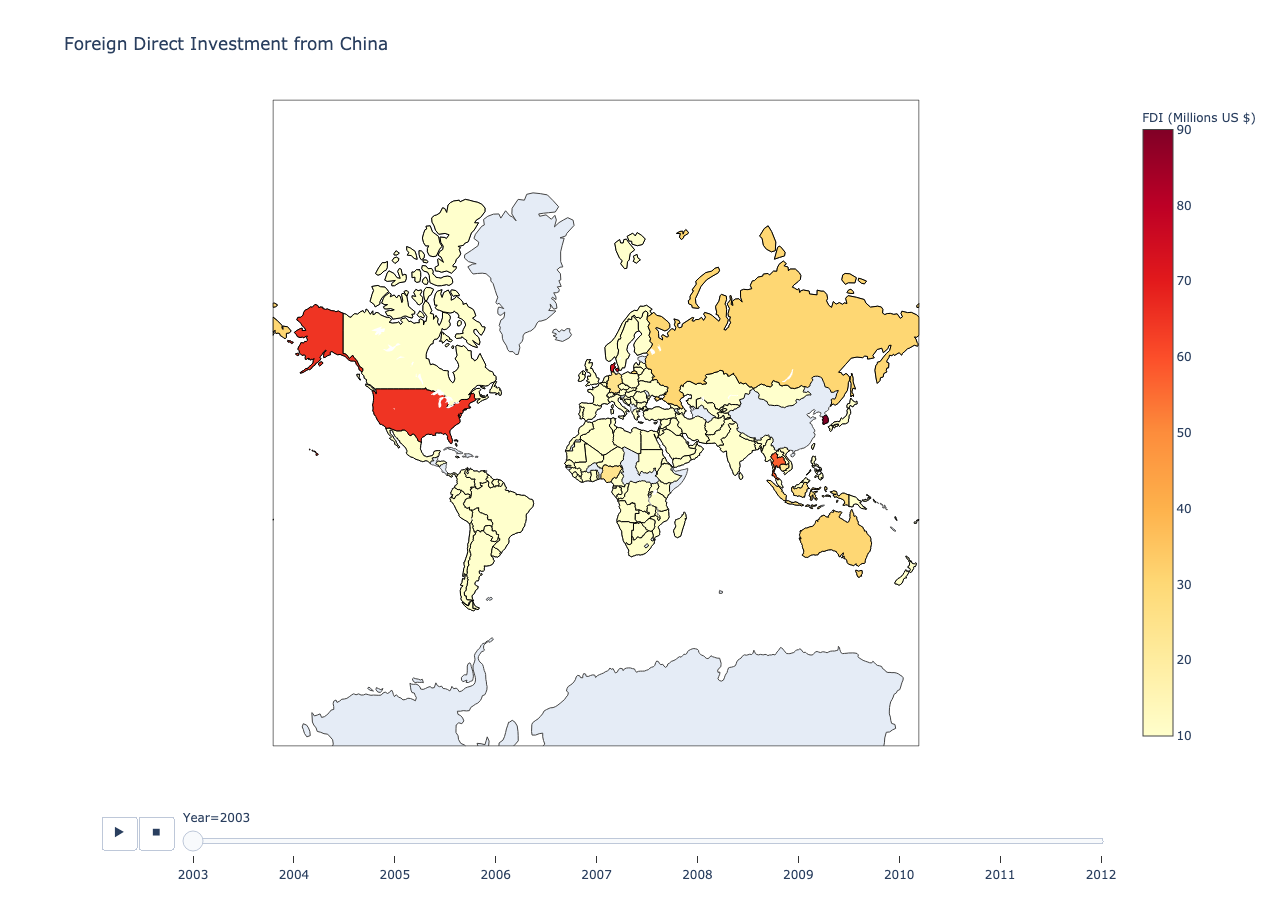

In [104]:
px.choropleth(df, locations="Economy", locationmode='country names',color="FDI (Millions US $)", hover_name="Economy", animation_frame="Year",
             color_continuous_scale=px.colors.sequential.YlOrRd, range_color=[10,90], projection='mercator', title='Foreign Direct Investment from China',
             width=900, height=900, center={'lat':35.0,'lon':0.0})

Let's see the growing influence in Afria and the Middle East:

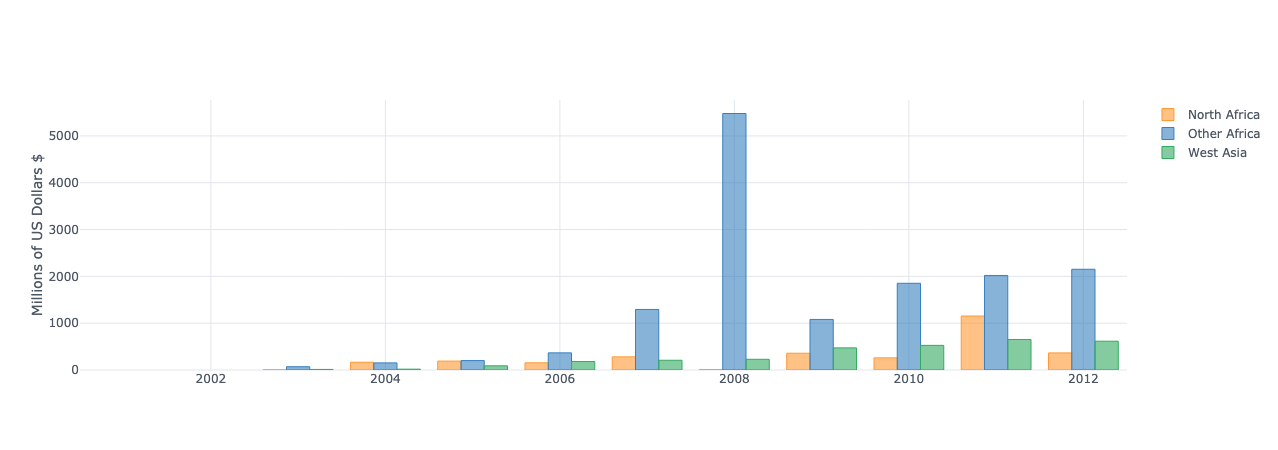

In [105]:
df = pd.read_csv('fdi_outflows.csv', encoding="ISO-8859-1")
regions = df[(df.Economy.isin(['West Asia', 'North Africa', 'Other Africa']))].set_index('Economy').T
regions.iplot(kind='bar',mode='group',theme='white', yTitle='Millions of US Dollars $')

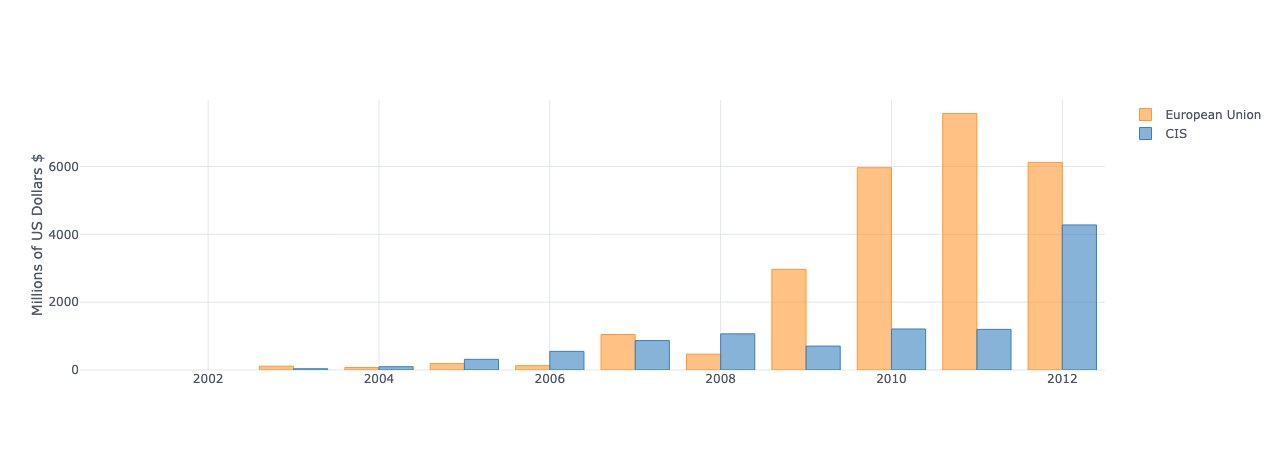

In [107]:
regions = df[(df.Economy.isin(['CIS', 'European Union']))].set_index('Economy').T
regions.iplot(kind='bar',mode='group',theme='white', yTitle='Millions of US Dollars $')

Now, let's try with a focus on the Western, developed world:

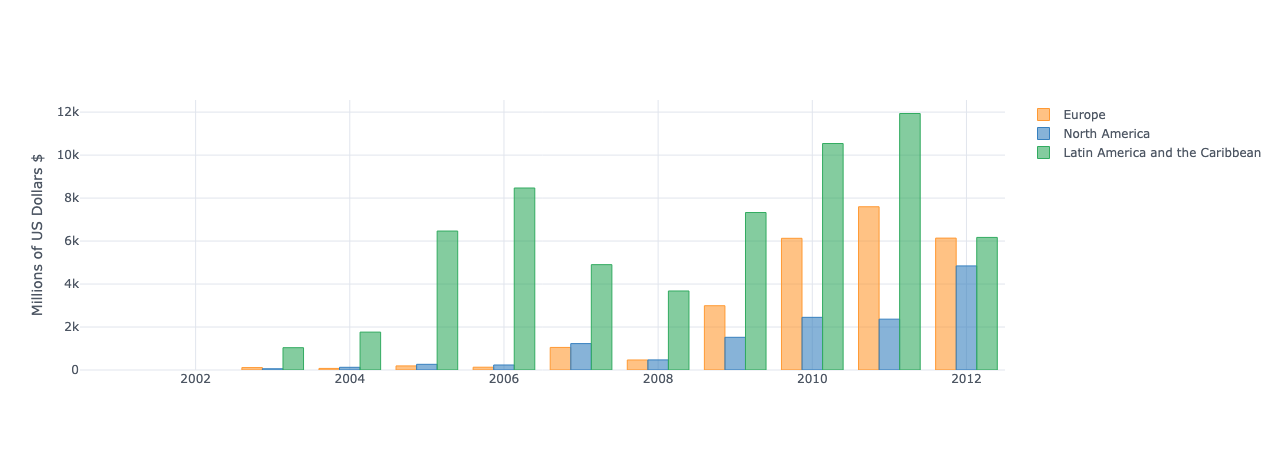

In [109]:
regions = df[(df.Economy.isin(['Europe','North America', 'Latin America and the Caribbean']))].set_index('Economy').T
regions.iplot(kind='bar',mode='group',theme='white', yTitle='Millions of US Dollars $')

Applying a log scale below given China's overarching investment in East Asia.

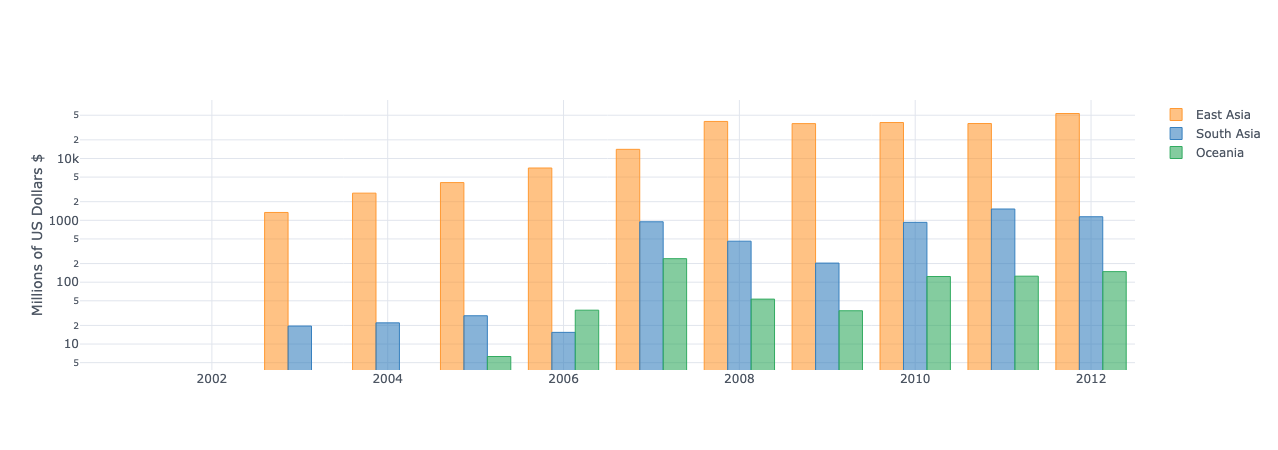

In [112]:
regions = df[(df.Economy.isin(['East Asia','South Asia', 'Oceania']))].set_index('Economy').T
regions.iplot(kind='bar',mode='group',theme='white', yTitle='Millions of US Dollars $', logy=True)